## Introduction à Python, Numpy et Scipy

1) Écrire une fonction nextpower qui calcule la première puissance de 2 supérieure ou égale à un nombre n (on veillera à ce que le type de sortie soit un int, tester cela avec type par exemple).

In [11]:
"""Return the smallest power of 2 greater or equel to n
"""
def nextpower(n):
    from math import log2, ceil, pow
    if(n < 1):
        return 1
    else:
        return 2 ** ceil(log2(n))

In [2]:
n = 1000000000000000000000000
assert (type(nextpower(n)) is int), "Result must be int"

2) En partant du mot contenant toutes les lettres de l’alphabet, générer par une opération de slicing la chaîne de caractère cfilorux et, de deux façons différentes, la chaîne de caractère vxz.

In [15]:
from string import ascii_lowercase
base = ascii_lowercase
cfilorux = base[2::3]
assert (cfilorux == "cfilorux"), "cfilorux is not correct"
cfilorux

'cfilorux'

In [19]:
vxz_1 = base[21::2]
assert (vxz_1 == "vxz"), "vxz is not correct"
vxz_1

'vxz'

In [31]:
vxz_2 = base[:-6:-2][::-1]
assert (vxz_2 == "vxz"), "vxz is not correct"
vxz_2

'vxz'

3) Afficher le nombre π avec 9 décimales après la virgule.

In [37]:
from math import pi
print( "%.9f" % pi)

3.141592654


4) Compter le nombre d’occurrences de chaque caractère dans la chaîne de caractères s="HelLo WorLd!!". On renverra un dictionnaire qui à chaque lettre associe son nombre d’occurrences.

In [40]:
from collections import Counter
s="HelLo WorLd!!"
dict(Counter(s))

{' ': 1,
 '!': 2,
 'H': 1,
 'L': 2,
 'W': 1,
 'd': 1,
 'e': 1,
 'l': 1,
 'o': 2,
 'r': 1}

5) Écrire une fonction de codage par inversion de lettres 1 : chaque lettre d’un mot est remplacée par une (et une seule) autre. On se servira de la fonction shuffle sur la chaîne de caractères contenant tout l’alphabet pour associer les lettres codées.

In [84]:
"""Return the input string s encoded with key k
"""
def cesar_encrypt(s, key):
    from string import ascii_lowercase
    key_map = {ascii_lowercase[i]:key[i] for i in range(0, len(ascii_lowercase))}
    key_map[" "] = " "
    return "".join([key_map[c] if c in key_map else c for c in s.lower()])

"""Return the input string s decoded with key k
"""
def cesar_decrypt(s, key):
    from string import ascii_lowercase
    key_map = {key[i]:ascii_lowercase[i] for i in range(0, len(ascii_lowercase))}
    key_map[" "] = " "
    return "".join([key_map[c] if c in key_map else c for c in s.lower()])

In [86]:
from string import ascii_lowercase
from  random import shuffle

# Build a random key
str_var = list(ascii_lowercase)
random.shuffle(str_var)
key= "".join(str_var)

test = "This is a test string."
encrypted = cesar_encrypt(test, key)
display(encrypted)
decrypted = cesar_decrypt(encrypted, key)
display(decrypted)
assert (decrypted == test.lower()), "Decrypted string must be same as encrypted"

'bozg zg c bhgb gbjzvt.'

'this is a test string.'

6) Calculer 2 4k2  ́ 1 efficacement. On pourra utiliser time (ou %timeit) pour déterminer la rapidité de votre méthode. 
Proposer une version avec et une version sans boucle (utilisant Numpy).


In [112]:
def compute_PI_1(N_max):
    result = 2
    for k in range(1, N_max):
        result *= (4 * k**2) / (4 * k**2 - 1)
    return result
%timeit compute_PI_1(1000000)

573 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [120]:
def compute_PI_2(N_max):
    import numpy as np
    def iterable():
        for k in range(1, N_max):
            yield ((4 * k**2) / (4 * k**2 - 1))
    array = np.fromiter(iterable(), float)
    return (2 * np.prod(array))
%timeit compute_PI_2(1000000)

614 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


7) Créer une fonction quicksort qui trie une liste, en remplissant les éléments manquants dans le code suivant. On testera que la fonction est correcte sur l’exemple quicksort([-2, 3, 5, 1, 3]) :

In [127]:
def quicksort(ll):
    """ a sorting algorithm with a pivot value"""
    if len(ll) <= 1:
        return ll
    else:
        pivot = ll.pop() # pivot = last element of the list ll. less = []
        less = []
        greater = []
        for x in ll:
            if x <= pivot:
                less.append(x) # append 'x' to 'less'
            else:
                greater.append(x) # append 'x' to 'greater'
        return quicksort(less) + [pivot] + quicksort(greater) # concatenate quicksort(less), pivot and quicksort(greater)

In [128]:
quicksort([-2, 3, 5, 1, 3])

[-2, 1, 3, 3, 5]

8) Sans utiliser de boucles for / while : créer une matrice M ∈ R5ˆ6 aléatoire à coefficients uniformes dans [-1, 1] puis remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante. Remplacer enfin les valeurs négatives par 0 en utilisant un masque binaire.

In [151]:
import numpy as np
# Create 5x6 matrix
A_mat = np.random.uniform(-1,1,(5,6))
# Create a mask to select pair columns
mask = np.array([[0, 1, 0, 1, 0, 1], 
                 [0, 1, 0, 1, 0, 1], 
                 [0, 1, 0, 1, 0, 1], 
                 [0, 1, 0, 1, 0, 1], 
                 [0, 1, 0, 1, 0, 1]])
result = A_mat - 2* np.roll(A_mat, 1) * mask
# Binary mask for negative values
binary_mask = result < 0
# Apply binary mask
result[binary_mask] = 0
result

array([[0.        , 0.98606932, 0.        , 1.64414088, 0.        ,
        0.8962324 ],
       [0.        , 0.1017477 , 0.        , 2.12656483, 0.41528819,
        0.07950009],
       [0.75534915, 0.        , 0.        , 0.76743414, 0.        ,
        0.05688309],
       [0.27054415, 0.        , 0.44632606, 0.        , 0.        ,
        1.59609877],
       [0.        , 2.56455985, 0.        , 0.11302868, 0.1411047 ,
        0.46785191]])

9) Créer une matrice M ∈ R5ˆ20 aléatoire à coefficients uniformes dans [-1,1]. Tester que G = M^T M est symétrique et que ses valeurs propres sont positives (on parle de alors de matrice définie positive). Quel est le rang de G ?
Aide : on utilisera par exemple np.allclose, np.logical_not, np.all pour les tests numériques.

In [177]:
import numpy as np

M_mat = np.random.uniform(-1,1,(5,20))
G_mat = M_mat.T @ M_mat
# G est symétrique, i.e égale à sa transposée
assert (np.allclose(G_mat, G_mat.T)), "G n'est pas symétrique !"
assert ( (np.linalg.eigvalsh(G_mat) + 1e-08 >= 0).all() ), "There is negative eigen values"
# G égal M.T * M et M de rang maximum 5 donc G de rang 5
assert (np.linalg.matrix_rank(G_mat) == 5 ), "G n'est pas de rang 5"

## Introduction à Pandas, Matplotlib, etc

On utilise la base de données Individual household electric power consumption Data Set, que l’on pourra télécharger depuis https://bitbucket.org/portierf/shared_files/downloads/ household_power_consumption.txt.
On s’intéresse aux grandeurs Global_active_power et Sub_metering_1.

10) Charger la base puis détecter et dénombrer le nombre de lignes ayant des valeurs manquantes.

In [64]:
import pandas as pd

url = "https://bitbucket.org/portierf/shared_files/downloads/household_power_consumption.txt"
full_base = pd.read_csv(url, delimiter=";")
# base = full_base.sample(frac=0.01)
base = full_base
base.head()

/cal/softs/anaconda/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [65]:
for c in ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", 
          "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]:
    base[c] = base[c].apply(pd.to_numeric, errors="coerce")
    
pd.isnull(base).sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Il y a 25979 lignes avec des valeurs manquantes donc 181853 valuers manquantes au total.

11) Supprimer toutes les lignes avec des valeurs manquantes.

In [66]:
clean_base = base.dropna()
pd.isnull(clean_base).sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

12) Modifier la variable Sub_metering_1 en la multipliant par 0.06.

In [67]:
clean_base["Sub_metering_1"] = clean_base["Sub_metering_1"].apply(lambda x: x * 0.06)

/cal/softs/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


13) Utiliser to_datetime et set_index pour créer un DataFrame (on prendra garde au format des dates internationales qui diffère du format français).

In [68]:
clean_base["Datetime"] = pd.to_datetime(clean_base['Date'].map(str) + clean_base['Time'], format="%d/%m/%Y%H:%M:%S")
df = clean_base.set_index("Datetime")
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.head()

/cal/softs/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


14) Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007. Proposer une cause expliquant la consommation fin février et début avril. On pourra utiliser en plus de matplotlib le package seaborn pour améliorer le rendu visuel.

In [69]:
!pip install --user seaborn

distributed 1.22.0 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [70]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

1

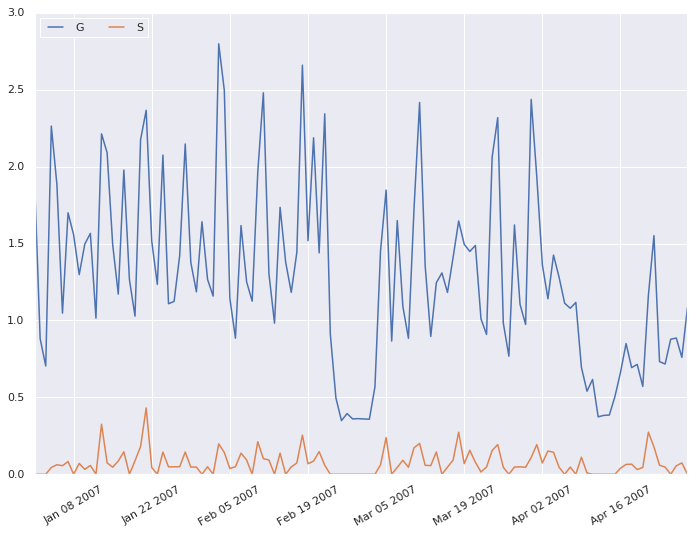

In [71]:
agg_df = df.loc[(df.index <= "2007-04-30") & (df.index >= "2007-01-01")].groupby(["Date"])["Global_active_power", 
"Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"].mean()

plt.plot(agg_df.index, agg_df.Global_active_power)
plt.plot(agg_df.index, agg_df.Sub_metering_1)
plt.legend('GS', ncol=2, loc='upper left')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
1

On ajoute des informations de température pour cette étude : les données utiles étant disponibles ici https://bitbucket.org/portierf/shared_files/downloads/TG_STAID011249.txt. 
Ici les températures relevées sont celles d’Orly (noter cependant qu’on ne connaît pas le lieux de relève de la précédente base de données).

15) Charger les données avec pandas, et ne garder que les colonnes DATE et TG. Diviser par 10 la colonne TG pour obtenir des températures en degrés Celsius. Traiter les éléments de température aberrants comme des NaN.

In [51]:
url = "https://bitbucket.org/portierf/shared_files/downloads/TG_STAID011249.txt"
df2 = pd.read_csv(url, delimiter=",", comment="#")
df2.columns = [c.strip() for c in df2.columns]
df2["DATE"] = pd.to_datetime(df2["DATE"], format="%Y%m%d")
df2 = df2[["DATE", "TG"]].set_index(["DATE"])
df2['TG'] = df2['TG'].apply(lambda x: x/10)
df2.head()

,TG
DATE,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5


In [56]:
import numpy as np
df2["TG"] = df2["TG"].replace(-9999, np.nan)
display(df2.isnull().sum())
df2 = df2.dropna()

TG    0
dtype: int64

16) Créer un DataFrame pandas des températures journalières entre le 1er janvier et le 30 avril 2007. Afficher sur un même graphique ces températures et la séries Global_active_power.

In [62]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

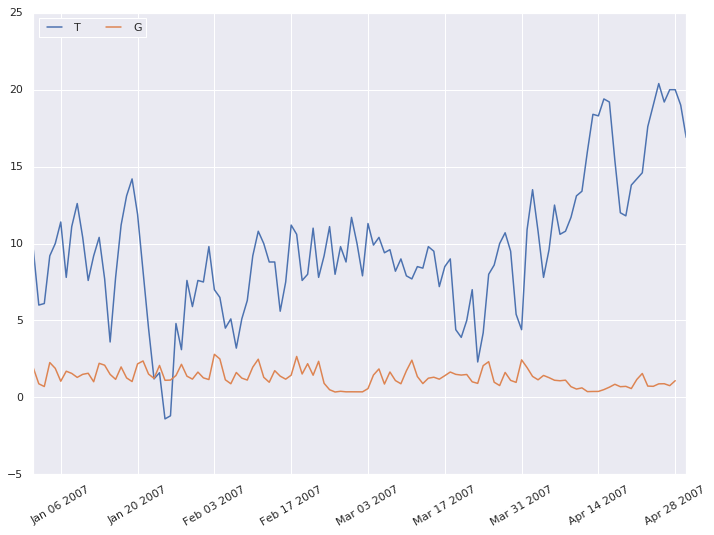

In [72]:
agg_df2 = df2.loc[(df2.index <= "2007-04-30") & (df2.index >= "2007-01-01")]

plt.plot(agg_df2.index, agg_df2.TG)
plt.plot(agg_df.index, agg_df.Global_active_power)
plt.legend('TG', ncol=2, loc='upper left')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)